In [1]:
import os
import sys
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sys.path.insert(1, os.path.join(sys.path[0], '..'))

from scheduler.plot import Plot
from scheduler.parser import parse_arguments

c:\Users\Admin\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
filenames=[
    "2022-08-05_19-30-11_carbon_latency_100_max_servers_15_timesteps_48",
    "2022-08-05_19-31-41_latency_latency_100_max_servers_15_timesteps_48"
]   
conf = parse_arguments(["-m", "-1", "-l", "-1", "-c", "-1", "-p", "europe"])
dfs = [pd.read_csv(f"../saved/{name}.csv") for name in filenames]
dfs_grouped_by_timestep = [df.groupby("timestep") for df in dfs]

Mean latency among all regions is: 27.172217040846355


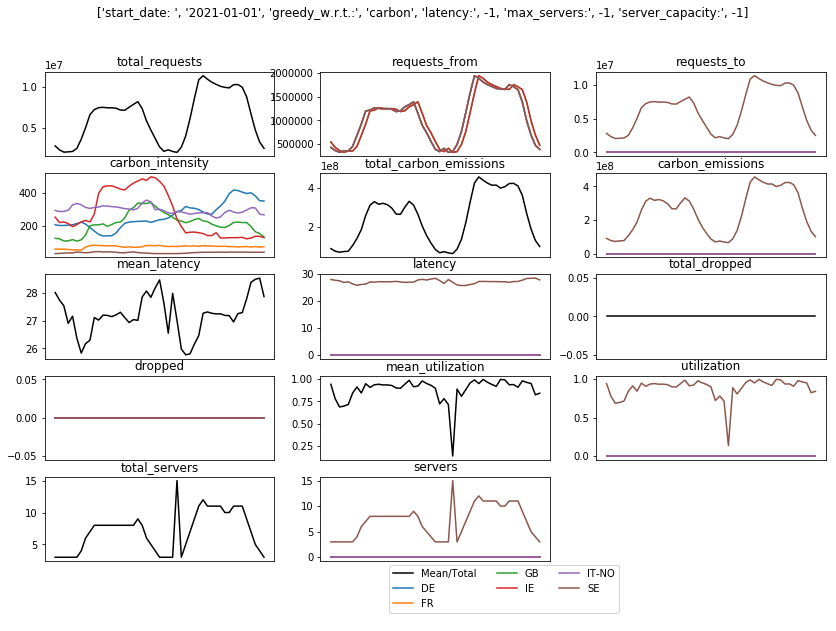

In [3]:
plot = Plot(conf)
plot.plot(df=dfs[0])

Mean latency among all regions is: 20.264004701084666


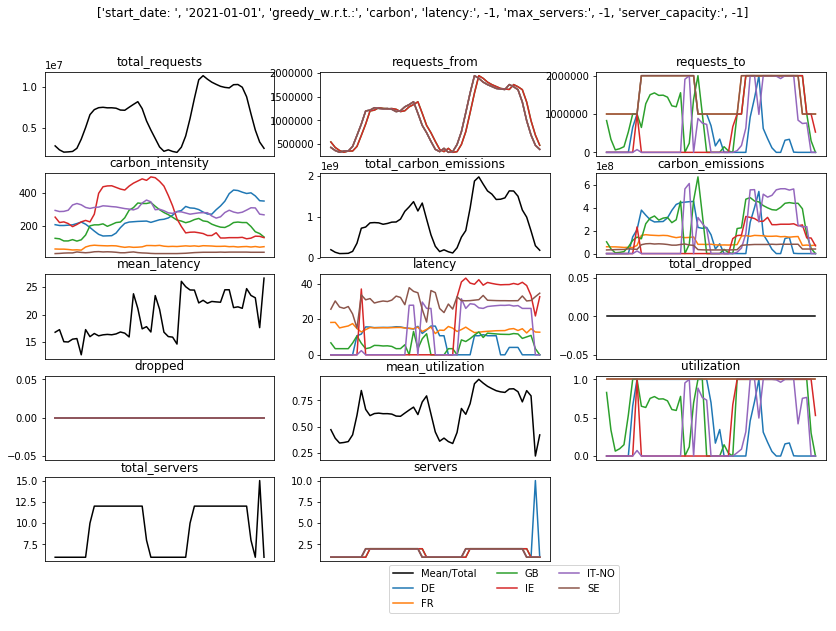

In [4]:
plot = Plot(conf)
plot.plot(df=dfs[1])

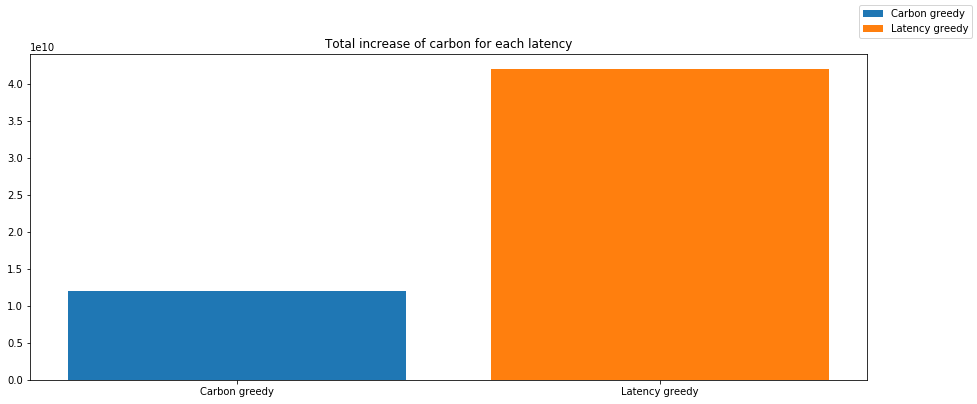

In [5]:
plot.plot_total_carbon(dfs_grouped_by_timestep, labels=["Carbon greedy", "Latency greedy"])